# STOCK PRICE ANALYZER with TWITTER REACTION

### 2019-01-11 by Park Si Hyung

> Python  library를 이용해 주식을 예측해봅니다

- 필요한 module들을 다운받습니다
- numpy, sklearn, matplotlib
- Support Vector Machine을 이용해 주가를 예측해봅시다

> 모델은 3가지를 사용합니다

- 선형모델
- 다항모델
- RBF모델(Radial Bias Fuction)

#### RBF의 특징은 다음과 같습니다
- 은닉층이 1개이다
- 유클리디안 거리를 사용한다
- 역전파 알고리즘
- 안정성 판별이 가능하다

c:\python\python3.7\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


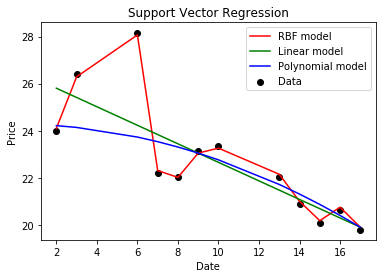

ValueError: Expected 2D array, got scalar array instead:
array=21.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [1]:
%matplotlib inline

import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

dates=[]
prices=[]

# 데이터를 csv로부터 받아와 저장합니다
# dates에는 날짜가, prices에는 open 가격을 넣어줍니다
def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            dates.append(int(row[0].split('-')[0]))
            prices.append(float(row[1]))
    return

# 주식을 예상해봅니다
def predict_prices(dates, prices, x):
    dates = np.reshape(dates, (len(dates), 1))

    # 선형
    svr_lin = SVR(kernel= 'linear', C=1e3)
    # 다항
    svr_poly = SVR(kernel = 'poly', C=1e3, degree = 2)
    # RBF
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma='auto')

    # 데이터 훈련
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)

    # 데이터 표현
    plt.scatter(dates, prices, color='black', label='Data')
    plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF model')
    plt.plot(dates, svr_lin.predict(dates), color='green', label='Linear model')
    plt.plot(dates, svr_poly.predict(dates), color='blue', label='Polynomial model')
    # 그래프 레이블링
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()

    #훈련된 데이터 반환
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

# CSV 파일 지정
get_data('snap.csv')
# 데이터 훈련
predicted_price = predict_prices(dates, prices, 21)
# 데이터 표시
print(predicted_price)

In [2]:
import pandas as pd

#pandas의 read_csv를 사용하면
#다음과 같이 data를 불러올 수 있습니다
snap_data = pd.read_csv('snap.csv')
snap_data

,Date,Open,High,Low,Close,Volume
0,17-Mar-17,19.80,19.85,18.90,19.54,34251973
1,16-Mar-17,20.65,20.69,19.75,19.89,25630157
2,15-Mar-17,20.08,21.40,20.05,20.77,24985920
3,14-Mar-17,20.90,20.98,20.15,20.58,20033167
4,13-Mar-17,22.05,22.15,20.96,21.09,20605862
5,10-Mar-17,23.36,23.40,22.00,22.07,18337600
6,9-Mar-17,23.15,23.68,22.51,22.71,25803174
7,8-Mar-17,22.03,23.43,21.31,22.81,49834423
8,7-Mar-17,22.21,22.50,20.64,21.44,71899652
9,6-Mar-17,28.17,28.25,23.77,23.77,72938848


# 더 쉽게 데이터를 받아오는 방법
# quandl 모듈을 사용해 봅니다

- start,end로 날짜를 지정하고
- quandl.get으로 주식 데이터를 불러옵니다
- 맨먼저 애플의 정보를 불러와봅니다
- AAPL은 2018년 4월부터 주식정보가 없는데 이유가 뭘까요 .. ?

### 하루에 50번 넘게 불러오면 차단됩니다 ! 유의하세요
- api를 등록하면 무제한으로 받아올 수 있습니다

In [3]:
import pandas as pd
import quandl
import datetime

#시작 날짜와 마지막 날짜를 지정해줍니다
#마지막 날짜는 현재 컴퓨터 시간입니다
start = datetime.datetime(2018,3,1)
end = datetime.date.today()
 
s = "AAPL"
apple = quandl.get("WIKI/" + s, start_date=start, end_date=end)

In [4]:
# apple 데이터의 타입을 확인해봅시다
type(apple)

#데이터를 읽고 정제하기 쉽게 DataFrame으로 불러오는것을 알수있습니다
#맨앞 몇개의 데이터만 살펴봅시다
apple.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-01,178.54,179.775,172.66,175.00,48801970.0,0.0,1.0,178.54,179.775,172.66,175.00,48801970.0
2018-03-02,172.80,176.300,172.45,176.21,38453950.0,0.0,1.0,172.80,176.300,172.45,176.21,38453950.0
2018-03-05,175.21,177.740,174.52,176.82,28401366.0,0.0,1.0,175.21,177.740,174.52,176.82,28401366.0
2018-03-06,177.91,178.250,176.13,176.67,23788506.0,0.0,1.0,177.91,178.250,176.13,176.67,23788506.0
2018-03-07,174.94,175.850,174.27,175.03,31703462.0,0.0,1.0,174.94,175.850,174.27,175.03,31703462.0


## 데이터에서 중요한 지표들

- Open : 시장이 열리고 난 후 가격
- High : 최고가
- Low : 최저가
- Close : 장이 마감한 후 가격
- Volume : 주식 거래 량
- Adj가 붙은 것은 조정된 가격을 나타냅니다

Populating the interactive namespace from numpy and matplotlib


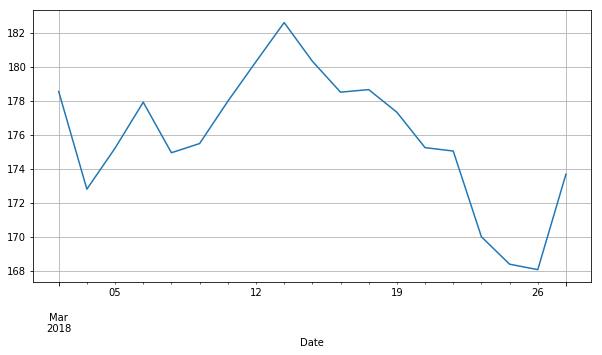

In [5]:
#plot 차트를 한번 그려봅시다

%pylab inline
pylab.rcParams['figure.figsize'] = (10,5)
apple['Open'].plot(grid=True)

# 나스닥 상위 20개 기업들의 트윗을 분석해 봅시다

> https://www.nasdaq.com/screening/companies-by-industry.aspx?sortname=marketcap&sorttype=1&exchange=NASDAQ

#### 상위 20개 기업들의 트윗을 감정분석

- TextBlob을 이용해 polarity와 subjectivity를 분석해봅니다
- polarity와 subjectivity가 어제,오늘 주식에 영향을 주는지 알아봅니다

In [6]:
from textblob import TextBlob
import nltk
import tweepy
import config
from textblob import TextBlob
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# 커스터머키
consumer_key = config.consumer_key
consumer_secret = config.consumer_secret
# 엑세스토큰
access_token = config.access_token
access_token_secret = config.access_token_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shpkc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shpkc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# 긍정, 부정, 주관적 요소들을 분석해봅니다

- polarity > 0일경우 긍정적, 0보다 작으면 부정적 반응
- polarity=0인 경우는 기사일 확률이 높습니다
- 트윗 반응이 긍정적인 기업과 부정적인 기업으로 나눠서 분석해봅시다
- 주관적 반응도 함께 알아봅니다

In [34]:
#나스닥 상위 20개 기업
nasdaq_20 = ['Amazon', 'Microsoft', 'Alphabet', 'Apple', 'Facebook', 'Intel', 'Cisco',
            'Comcast', 'Pepsico', 'Netflix', 'Amgen', 'Adobe', 'PayPal', 'Broadcom', 
            'Costco', 'Texas Instruments', 'Twenty-First Century', 'Gilead Sciences',
            'NVIDIA', 'GILD']

#기업들의 트윗분석을 넣어줄 리스트
nasdaq_20_polarity_positive = []
nasdaq_20_polarity_negative = []
nasdaq_20_subjectivity = []

#20개 나스닥의 긍정, 부정, 주관을 알아봅니다
for company in nasdaq_20:
    company_tweet = api.search(company, len='en', count=100)
    
    polarity_score = 0
    subjectivity_score = 0
    
    for tweet in company_tweet:
        company = TextBlob(tweet.text)
        
        polarity_score += company.sentiment.polarity
        subjectivity_score += company.sentiment.subjectivity
    
    #긍정적일 경우 nasdaq_20_polarity_positive에 추가해주고
    #부정적일 경우 nasdaq_20_polarity_negative에 추가해줍니다
    if polarity_score > 0:
        nasdaq_20_polarity_positive.append(1)
        nasdaq_20_polarity_negative.append(0)
    else:
        nasdaq_20_polarity_positive.append(0)
        nasdaq_20_polarity_negative.append(1)
        
    #주관을 나타내는 subjectivity는 그냥 모두 더해서 넣어줍니다
    nasdaq_20_subjectivity.append(subjectivity_score)
        

In [41]:
#DataFrame을 만들어 기업이름, 긍정&부정, 주관 데이터를 저장합니다
df_stock = pd.DataFrame({'company' : nasdaq_20,
                        'company_polarity_positive' : nasdaq_20_polarity_positive,
                        'company_polarity_negative' : nasdaq_20_polarity_negative,
                        'company_subjectivity' : nasdaq_20_subjectivity})
df_stock

,company,company_polarity_positive,company_polarity_negative,company_subjectivity
0,Amazon,1,0,14.518497
1,Microsoft,1,0,32.394066
2,Alphabet,1,0,27.809444
3,Apple,1,0,14.311396
4,Facebook,1,0,8.207071
5,Intel,1,0,34.523182
6,Cisco,1,0,17.352438
7,Comcast,0,1,30.531032
8,Pepsico,1,0,9.167929
9,Netflix,1,0,18.897924


# 어제 주식과 오늘 주식을 비교해봅니다

- 등락 여부를 나타내는 함수를 만듭니다
- 어제의 Open, High, Low, Close를 모두 더해
- 오늘과 비교해 봅시다

> 오늘 주식 또한 Open, High, Low, Close를 모두 더합니다



In [14]:
trend_data = []

#등락여부를 나타내는 함수
def stock_change(stock_data):
    prev_price = 0
    today_price = 0
   
    #어제의 Open부터 Close까지 더합니다
    for i in range(4):
        prev_price += stock_data.iloc[0,i]
    #오늘의 Open부터 Close까지 더합니다 
    for i in range(4):
        today_price += stock_data.iloc[1,i]
    
    #어제보다 올랐으면 1, 내렸으면 0을 반환합니다
    if today_price > prev_price :
        trend_data.append(1)
    else:
        trend_data.append(0)

In [17]:
start_date = datetime.datetime(2018,1,10)
end_date = datetime.datetime(2018,1,11)

#주식을 불러오기 위해선 코드명이 필요합니다
#코드명을 넣어줍니다
#나중에는 크롤링을 이용해서 불러올수 있게 해보겠습니다
nasdaq_20_code = ['AMZN', 'MSFT', 'GOOGL', 'GOOG', 'AAPL', 'FB', 'INTC', 'CSCO', 'CMCSA', 'PEP', 'NFLX',
                 'AMGN', 'ADBE', 'PYPL', 'AVGO', 'TXN', 'COST', 'FOX', 'NVDA', 'GILD']


for i in range(12,20):
    code = nasdaq_20_code[i]
    stock_data = quandl.get("WIKI/" + code, start_date=start_date, end_date=end_date)
    
    stock_change(stock_data)


In [42]:
#DataFrame에 trend column을 만들고 분석한 trend를 넣어줍니다
df_stock.insert(4, 'trend', trend_data)

#trend 데이터를 살펴봅니다
#전날보다 증가한 기업이 16개, 전날보다 감소한 기업이 4개 있습니다
df_stock['trend'].value_counts()

1    16
0     4
Name: trend, dtype: int64

# 트위터가 주가에 영향을 주는지 분석해봅니다

- 히트맵을 그려서 상관관계를 알아봅시다
- seaborn의 heatmap을 사용합니다

> 긍정적,부정적영향과 subjectivity도 알아봅시다

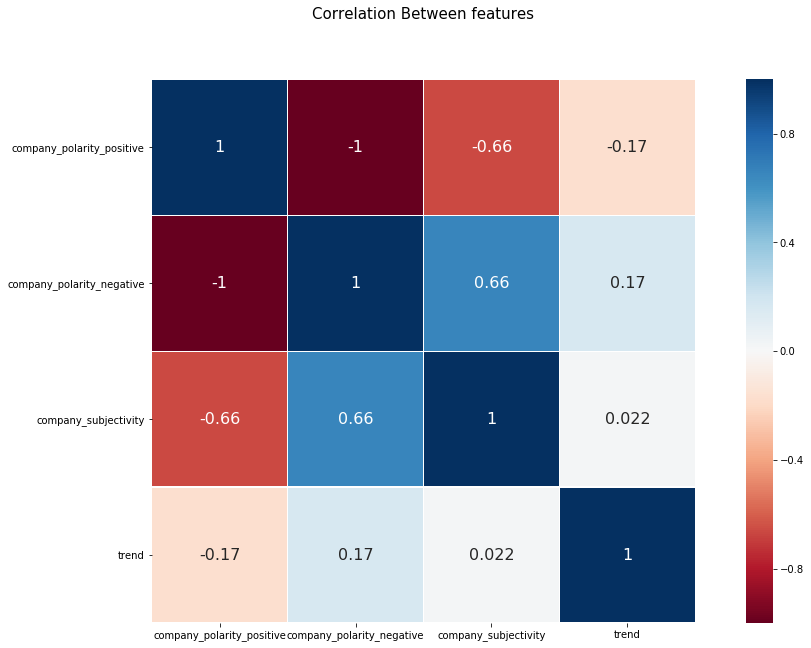

In [46]:
import seaborn as sns

heatmap_data = df_stock[['company_polarity_positive', 'company_polarity_negative', 'company_subjectivity','trend']]

colormap = plt.cm.RdBu
plt.figure(figsize=(18,10))
plt.title('Correlation Between features', size=15, y=1.1)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

# 히트맵을 살펴봅시다

- trend와 company_polarity_positive는 상관관계가 -0.17로
- 트윗반응이 긍정적일수록 주가가 내려갑니다 !?
<br><br>
- trend와 company_polarity_negative는 상관관계가 0.17로
- 트윗반응이 부정적일수록 호재입니다
<br>

>주관적인 반응은 주가에 영향을 거의 미치지 않는것을 알 수 있습니다